## Data Cleaning

### Approach

- Importing and inspecting the data sets.
- After that -> cleaning the data accordingly.
- Creating Meta-Data for all the data sets.

#### Importing Libraries

In [2]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import requests
import geopandas as gpd

#### Downloading CSV file from web

In [3]:
# Importing the csv file from the website with the defined 'url' variable
# First 10 rows not needed
df_charging_stations = pd.read_csv('charging_stations.csv', delimiter=';', encoding='iso8859-1', skiprows=10, dtype={'Postleitzahl': str})

In [4]:
# checking and confirming the status of the df 
type(df_charging_stations)

pandas.core.frame.DataFrame

In [5]:
# calling the dataframe to check on it's content
df_charging_stations.head(2)

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,smopi®,Albstraße,14,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",...,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN


In [6]:
"""
# Download the database
r = requests.get(url)

# Save database to local file storage
with open(path+zip_file, 'wb') as f:
    f.write(r.content)
"""

"\n# Download the database\nr = requests.get(url)\n\n# Save database to local file storage\nwith open(path+zip_file, 'wb') as f:\n    f.write(r.content)\n"

### Simple EDA "charging stations"

In [7]:
# Checking rows and columns
df_charging_stations.shape

(40674, 26)

In [8]:
# Checking for null values and data types
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Betreiber               40674 non-null  object
 1   Straße                  40674 non-null  object
 2   Hausnummer              40674 non-null  object
 3   Adresszusatz            5761 non-null   object
 4   Postleitzahl            40674 non-null  object
 5   Ort                     40674 non-null  object
 6   Bundesland              40674 non-null  object
 7   Kreis/kreisfreie Stadt  40674 non-null  object
 8   Breitengrad             40674 non-null  object
 9   Längengrad              40674 non-null  object
 10  Inbetriebnahmedatum     40674 non-null  object
 11  Anschlussleistung       40674 non-null  object
 12  Art der Ladeeinrichung  40673 non-null  object
 13  Anzahl Ladepunkte       40674 non-null  int64 
 14  Steckertypen1           40674 non-null  object
 15  P1

In [9]:
# Checking the dataframes central tendencies
df_charging_stations.describe()

,Anzahl Ladepunkte
count,40674.000000
mean,1.900108
std,0.574907
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


In [10]:
# Checking for the columns 
df_charging_stations.columns

Index(['Betreiber', 'Straße', 'Hausnummer', 'Adresszusatz', 'Postleitzahl',
       'Ort', 'Bundesland', 'Kreis/kreisfreie Stadt', 'Breitengrad',
       'Längengrad', 'Inbetriebnahmedatum', 'Anschlussleistung',
       'Art der Ladeeinrichung', 'Anzahl Ladepunkte', 'Steckertypen1',
       'P1 [kW]', 'Public Key1', 'Steckertypen2', 'P2 [kW]', 'Public Key2',
       'Steckertypen3', 'P3 [kW]', 'Public Key3', 'Steckertypen4', 'P4 [kW]',
       'Public Key4'],
      dtype='object')

In [11]:
# Translating column names from German to English
# Changing the names in a pythonic way. lower case and replacing ' ' with '_'
df_charging_stations.rename(columns={'Betreiber': 'operator',
                                     'Straße': 'street',
                                     'Hausnummer': 'house_number',
                                     'Adresszusatz' : 'address_addition',
                                     'Postleitzahl': 'zip_code',
                                     'Ort': 'city',
                                     'Bundesland': 'federal_state',
                                     'Kreis/kreisfreie Stadt': 'county',
                                     'Breitengrad': 'latitude',
                                     'Längengrad': 'longitude',
                                     'Inbetriebnahmedatum': 'commissioning_date',
                                     'Anschlussleistung': 'connecting_power',
                                     'Art der Ladeeinrichung': 'charging_device_type',
                                     'Anzahl Ladepunkte': 'numbers_charging_points',
                                     'Steckertypen1': 'plug_types_1',
                                     'P1 [kW]': 'p1_kw',
                                     'Public Key1': 'public_key1',
                                     'Steckertypen2': 'plug_types_2',
                                     'P2 [kW]': 'p2_kw',
                                     'Public Key2': 'public_key2',
                                     'Steckertypen3': 'plug_types_3',
                                     'P3 [kW]': 'p3_kw',
                                     'Public Key3': 'public_key3',
                                     'Steckertypen4': 'plug_types_4',
                                     'P4 [kW]': 'p4_kw',
                                     'Public Key4': 'public_key4'}, inplace=True)

In [12]:
# Checking the new column names
df_charging_stations.columns

Index(['operator', 'street', 'house_number', 'address_addition', 'zip_code',
       'city', 'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'public_key1',
       'plug_types_2', 'p2_kw', 'public_key2', 'plug_types_3', 'p3_kw',
       'public_key3', 'plug_types_4', 'p4_kw', 'public_key4'],
      dtype='object')

In [13]:
# Dropping the unnecessary columns
df_charging_stations.drop(['address_addition', 'public_key1', 'public_key2', 'public_key3', 'public_key4'], axis=1, inplace= True)

In [14]:
# Calling df again to check if columns are updated
df_charging_stations.columns

Index(['operator', 'street', 'house_number', 'zip_code', 'city',
       'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'plug_types_2',
       'p2_kw', 'plug_types_3', 'p3_kw', 'plug_types_4', 'p4_kw'],
      dtype='object')

#### Meta Data

|Variable |Definition  | Key|
|--- | --- | ---|
|**operator**| Operator of the charging station ||
|**street**| Street of the charging station ||
|**house_number**| House number ||
|**zip_code**| Zip code ||
|**city**| City ||
|**federal_state**| Federal state of Germany ||
|**county**| County and independent city ||
|**latitude**| Coordinates of charging station ||
|**longitude**| Coordinates of charging station ||
|**commissioning_date**| Starting date of operation(Jan 2017 - Jan2023) | 'DD'/'MM'/'YY' |
|**connecting_power**| Power of charging station | Unit = kW |
|**charging_device_type**| Normal/ fast charging device ||
|**numbers_charging_points**| Number of charging points with varied numbers of connectors("Ladesäule") | 1, 2, 3, 4 |
|**plug_types_1**| Type of connectors |  |
|**p1_kw**| Power outage of first charging point | Unit = kW |
|**plug_types_2**| Type of connectors |  |
|**p2_kw**| Power outage of second charging point | Unit = kW |
|**plug_types_3**| Type of connectors |  |
|**p3_kw**| Power outage of third charging point | Unit = kW |
|**plug_types_4**| Type of connectors |  |
|**p4_kw**| Power outage of fourth charging point | Unit = kW |

#### Detailed EDA

In [15]:
# Check for missing values
print(df_charging_stations.isnull().sum())

operator                       0
street                         0
house_number                   0
zip_code                       0
city                           0
federal_state                  0
county                         0
latitude                       0
longitude                      0
commissioning_date             0
connecting_power               0
charging_device_type           1
numbers_charging_points        0
plug_types_1                   0
p1_kw                          0
plug_types_2                7756
p2_kw                       7759
plug_types_3               38327
p3_kw                      38328
plug_types_4               39417
p4_kw                      39417
dtype: int64


In [16]:
# Handling missing values with fillna
# df_charging_stations.fillna(value= "NaN", inplace= True)

In [17]:
# Getting rid of leading or trailing whitespaces
df_charging_stations = df_charging_stations.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_charging_stations.tail(2)

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw
40672,Stadtwerke Weimar Stadtversorgungs-GmbH,Wunderwaldstraße,2a,99518,Bad Sulza,Thüringen,Landkreis Weimarer Land,"51,092527","11,628574",13.08.2018,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN
40673,TEAG Mobil GmbH,Sulzaer Straße,0,99518,Großheringen,Thüringen,Landkreis Weimarer Land,"51,107188","11,659489",28.02.2019,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN


In [18]:
# Checking for duplicates
duplicates = df_charging_stations.duplicated()
print('Number of duplicate entries: ', duplicates.sum())
print(duplicates)

Number of duplicate entries:  6177
0        False
1        False
2        False
3        False
4        False
         ...  
40669    False
40670    False
40671    False
40672    False
40673    False
Length: 40674, dtype: bool


In [19]:
# Calling dataframe after dealing with duplicates
df_charging_stations.tail(3)

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw
40671,bft Tankstelle Christian Hollmotz,Dorfstr.,101,99510,Obertrebra,Thüringen,Landkreis Weimarer Land,"51,06077","11,56556",01.01.2022,...,Schnellladeeinrichtung,2,DC Kupplung Combo,300,DC Kupplung Combo,300,NaN,NaN,NaN,NaN
40672,Stadtwerke Weimar Stadtversorgungs-GmbH,Wunderwaldstraße,2a,99518,Bad Sulza,Thüringen,Landkreis Weimarer Land,"51,092527","11,628574",13.08.2018,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN
40673,TEAG Mobil GmbH,Sulzaer Straße,0,99518,Großheringen,Thüringen,Landkreis Weimarer Land,"51,107188","11,659489",28.02.2019,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN


In [20]:
# Checking if any column starts with a space
for col in df_charging_stations.columns:
    if df_charging_stations[col].dtype == 'O': # check if column has object dtype (i.e. contains strings)
        if df_charging_stations[col].str.startswith(' ').any(): # check if any string in column starts with a space
            print(f"Column {col} contains values starting with a space.")

In [21]:
# Convert 'commissioning_date' column to datetime format
df_charging_stations["commissioning_date"] = pd.to_datetime(df_charging_stations["commissioning_date"], format= '%d.%m.%Y', dayfirst= True)

In [22]:
# Concatenate all plug types into a single string column
df_charging_stations['all_plug_types'] = (
    df_charging_stations['plug_types_1'].fillna('').str.replace(' ', '') + ',' +
    df_charging_stations['plug_types_2'].fillna('').str.replace(' ', '') + ',' +
    df_charging_stations['plug_types_3'].fillna('').str.replace(' ', '') + ',' +
    df_charging_stations['plug_types_4'].fillna('').str.replace(' ', '')
)

In [23]:
df_charging_stations.head(2)

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",2020-01-11,...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"
1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",2022-11-23,...,4,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp..."


In [24]:
# Split the all_plug_types column and flatten the resulting list
plug_types_list = df_charging_stations['all_plug_types'].str.replace(';', ',').str.split(',').explode()

# Get the unique plug types
unique_plug_types = plug_types_list.unique()

# Print the unique plug types
print(unique_plug_types)


['ACSteckdoseTyp2' '' 'ACKupplungTyp2' 'DCKupplungCombo' 'DCCHAdeMO'
 'ACSchuko' 'ACCEE5polig' 'ACCEE3polig'
 'AdapterTyp1\xa0AutoaufTyp2Fahrzeugkupplung' 'DCKupplungTeslaTyp2'
 'Tesla' 'Caravan-Socket' 'CEE-Stecker' 'Typ2/Tesla' 'AC/CEE']


In [25]:
# Count the occurrence of each unique plug type
plug_type_counts = plug_types_list.value_counts()

# Print the counts
print(plug_type_counts)


                                           85500
ACSteckdoseTyp2                            60523
DCKupplungCombo                            11435
ACKupplungTyp2                              6846
ACSchuko                                    4797
DCCHAdeMO                                   3244
ACCEE5polig                                   73
ACCEE3polig                                   40
Tesla                                          2
AdapterTyp1 AutoaufTyp2Fahrzeugkupplung        1
DCKupplungTeslaTyp2                            1
Caravan-Socket                                 1
CEE-Stecker                                    1
Typ2/Tesla                                     1
AC/CEE                                         1
Name: all_plug_types, dtype: int64


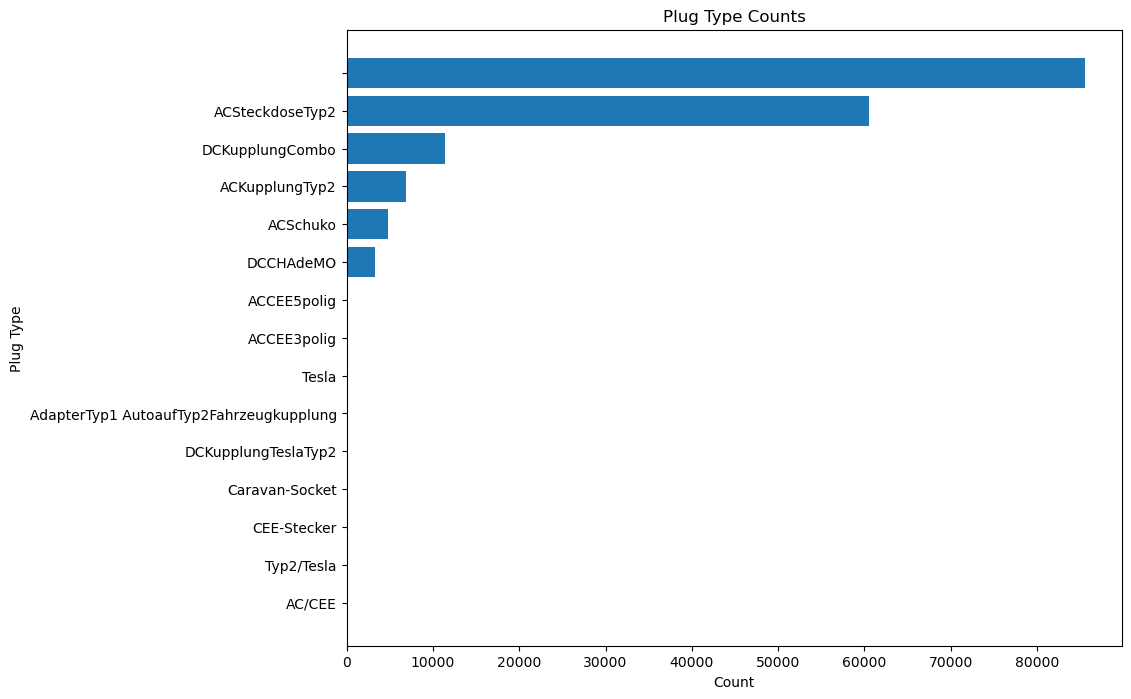

In [26]:
# Create a bar chart of plug type counts
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(plug_type_counts.index, plug_type_counts.values, align='center')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Plug Type')
ax.set_title('Plug Type Counts')

plt.show()


In [27]:
df_charging_stations.shape

(40674, 22)

In [28]:
# Including an index
df_charging_stations.reset_index(inplace=True)

In [29]:
df_charging_stations.head(1)

,index,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"


In [30]:
# Renaming the index into cs_id to have a unique identifier
df_charging_stations.rename(columns={'index' : 'cs_id'}, inplace=True)
df_charging_stations.head(2)

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"
1,1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",...,4,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp..."


In [31]:
df_charging_stations.columns

Index(['cs_id', 'operator', 'street', 'house_number', 'zip_code', 'city',
       'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'plug_types_2',
       'p2_kw', 'plug_types_3', 'p3_kw', 'plug_types_4', 'p4_kw',
       'all_plug_types'],
      dtype='object')

In [32]:
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cs_id                    40674 non-null  int64         
 1   operator                 40674 non-null  object        
 2   street                   40674 non-null  object        
 3   house_number             40674 non-null  object        
 4   zip_code                 40674 non-null  object        
 5   city                     40674 non-null  object        
 6   federal_state            40674 non-null  object        
 7   county                   40674 non-null  object        
 8   latitude                 40674 non-null  object        
 9   longitude                40674 non-null  object        
 10  commissioning_date       40674 non-null  datetime64[ns]
 11  connecting_power         40674 non-null  object        
 12  charging_device_type     40673 n

In [33]:
# Variable with all columns to change
cols_to_convert = ['latitude', 'longitude', 'connecting_power', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw']
# Replace commas with dots
for col in cols_to_convert:
    df_charging_stations[col] = df_charging_stations[col].str.replace(',', '.')

In [34]:
# Calling DataFrame again to look at the result
df_charging_stations.head(2)

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"
1,1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,...,4,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp..."


In [35]:
# Replace empty strings with NaN values
df_charging_stations[cols_to_convert] = df_charging_stations[cols_to_convert].replace('', np.nan)

In [36]:
# Convert data types from object to float for specific columns
df_charging_stations[cols_to_convert] = df_charging_stations[cols_to_convert].astype(float)

In [37]:
# Checking the new data types
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cs_id                    40674 non-null  int64         
 1   operator                 40674 non-null  object        
 2   street                   40674 non-null  object        
 3   house_number             40674 non-null  object        
 4   zip_code                 40674 non-null  object        
 5   city                     40674 non-null  object        
 6   federal_state            40674 non-null  object        
 7   county                   40674 non-null  object        
 8   latitude                 40674 non-null  float64       
 9   longitude                40674 non-null  float64       
 10  commissioning_date       40674 non-null  datetime64[ns]
 11  connecting_power         40674 non-null  float64       
 12  charging_device_type     40673 n

In [38]:
# Saving the df as a csv file in this Repo on GitHub 
#df_charging_stations.to_csv('charging_stations_clean.csv', index=False)

In [39]:
# Checking if there are zip_codes with only 4 digits
df_charging_stations[df_charging_stations['zip_code'].astype(str).str.len() < 5]

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types


### Simple EDA "zip codes"

In [40]:
# Reading excel file into a DataFrame
df_zip = pd.read_excel('zip_code_ger.xlsx', dtype={'PLZ': str})

In [41]:
df_zip.shape

(8196, 4)

In [42]:
df_zip.head(2)

,PLZ,Bundesland,Kreis,Typ
0,1067,Sachsen,Dresden,Stadt
1,1069,Sachsen,Dresden,Stadt


In [43]:
df_zip[df_zip['PLZ'].astype(str).str.len() < 5]

,PLZ,Bundesland,Kreis,Typ
0,1067,Sachsen,Dresden,Stadt
1,1069,Sachsen,Dresden,Stadt
2,1097,Sachsen,Dresden,Stadt
3,1099,Sachsen,Dresden,Stadt
4,1108,Sachsen,Dresden,Stadt
...,...,...,...,...
620,9634,Sachsen,Mittelsachsen,Kreis
621,9638,Sachsen,Mittelsachsen,Kreis
622,9648,Sachsen,Mittelsachsen,Kreis
623,9661,Sachsen,Mittelsachsen,Kreis


In [44]:
# Convert zip code column to string type and add leading zeros
df_zip['PLZ'] = df_zip['PLZ'].astype(str).str.zfill(5)

In [45]:
# Convert PLZ column to object type
# df_zip['PLZ'] = df_zip['PLZ'].astype(str)

In [46]:
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PLZ         8196 non-null   object
 1   Bundesland  8196 non-null   object
 2   Kreis       8196 non-null   object
 3   Typ         8196 non-null   object
dtypes: object(4)
memory usage: 256.2+ KB


In [47]:
df_zip.head(10)

,PLZ,Bundesland,Kreis,Typ
0,01067,Sachsen,Dresden,Stadt
1,01069,Sachsen,Dresden,Stadt
2,01097,Sachsen,Dresden,Stadt
3,01099,Sachsen,Dresden,Stadt
4,01108,Sachsen,Dresden,Stadt
5,01109,Sachsen,Dresden,Stadt
6,01127,Sachsen,Dresden,Stadt
7,01129,Sachsen,Dresden,Stadt
8,01139,Sachsen,Dresden,Stadt
9,01156,Sachsen,Dresden,Stadt


In [48]:
# Merge the dataframes using plz and zip_code columns
df_final_cs = pd.merge(df_charging_stations, df_zip, how='left', left_on='zip_code', right_on='PLZ')

In [49]:
# Checking info and shape of new merged DataFrame
df_final_cs.shape

(40674, 27)

In [50]:
df_final_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40674 entries, 0 to 40673
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cs_id                    40674 non-null  int64         
 1   operator                 40674 non-null  object        
 2   street                   40674 non-null  object        
 3   house_number             40674 non-null  object        
 4   zip_code                 40674 non-null  object        
 5   city                     40674 non-null  object        
 6   federal_state            40674 non-null  object        
 7   county                   40674 non-null  object        
 8   latitude                 40674 non-null  float64       
 9   longitude                40674 non-null  float64       
 10  commissioning_date       40674 non-null  datetime64[ns]
 11  connecting_power         40674 non-null  float64       
 12  charging_device_type     40673 n

In [51]:
# Counting all unique zip codes from df_charging_stations
df_charging_stations.zip_code.nunique()

6202

In [52]:
# Counting all unique zip codes from df_zip
df_zip.PLZ.nunique()

8196

In [53]:
# Checking the rows in PLZ with null values
null_rows = df_final_cs[df_final_cs['PLZ'].isnull()]
null_rows

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types,PLZ,Bundesland,Kreis,Typ
87,87,EnBW mobility+ AG und Co.KG,Badstubenweg,1,89579,Munderkingen,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.233968,9.644065,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSchuko,ACSteckdoseTyp2,ACSch...",NaN,NaN,NaN,NaN
1370,1370,Autohaus Briem GmbH & Co. KG,Stuttgarter Str.,87,70711,Leinfelden-Echterdingen,Baden-Württemberg,Landkreis Esslingen,48.702103,9.140427,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",NaN,NaN,NaN,NaN
1836,1836,EnBW ODR AG,Wilhelmstr.,3,89457,Gerstetten,Baden-Württemberg,Landkreis Heidenheim,48.622129,10.021391,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",NaN,NaN,NaN,NaN
1911,1911,Lidl,Hohenloherstraße,2,74166,Neckarsulm,Baden-Württemberg,Landkreis Heilbronn,49.184338,9.225267,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",NaN,NaN,NaN,NaN
2123,2123,SMATRICS GmbH & Co KG,Daimlerstraße,8,74197,Neuenstadt am Kocher,Baden-Württemberg,Landkreis Heilbronn,49.238619,9.341146,...,150.0,NaN,NaN,NaN,NaN,"DCKupplungCombo,DCKupplungCombo,,",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,40193,envia Mitteldeutsche Energie AG,Zeitzer Str.,45,03448,Meuselwitz,Thüringen,Landkreis Altenburger Land,51.047065,12.293386,...,22.0,NaN,NaN,NaN,NaN,"DCKupplungCombo,DCCHAdeMO,ACSteckdoseTyp2,,",NaN,NaN,NaN,NaN
40311,40311,TEAG Mobil GmbH,Bertholdstraße,0,98443,Schleusingen,Thüringen,Landkreis Hildburghausen,50.510540,10.755407,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",NaN,NaN,NaN,NaN
40339,40339,PV Laden Gehren,Esbachstr.,21c,98694,Ilmenau,Thüringen,Landkreis Ilm-Kreis,50.654332,11.005267,...,NaN,NaN,NaN,NaN,NaN,"ACKupplungTyp2,,,",NaN,NaN,NaN,NaN
40340,40340,PV Laden Gehren,Esbachstr.,21c,98694,Ilmenau,Thüringen,Landkreis Ilm-Kreis,50.654332,11.005267,...,NaN,NaN,NaN,NaN,NaN,"ACKupplungTyp2,,,",NaN,NaN,NaN,NaN


In [54]:
# Fill null values in plz column with zip_code values
df_final_cs['PLZ'].fillna(df_final_cs['zip_code'], inplace=True)

In [55]:
# Checking the rows in PLZ with null values again
null_rows = df_final_cs[df_final_cs['PLZ'].isnull()]
null_rows

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types,PLZ,Bundesland,Kreis,Typ


In [56]:
# Check if 'Kreis' and 'Bundesland' have null values
print(df_final_cs[['Kreis', 'Bundesland']].isnull().sum())

Kreis         499
Bundesland    499
dtype: int64


In [57]:
# Filling the null values of 'Kreis' and 'Bundesland' with the corresponding values from 'city' and 'federal_state'
df_final_cs['Kreis'] = df_final_cs['Kreis'].fillna(df_final_cs['city'])
df_final_cs['Bundesland'] = df_final_cs['Bundesland'].fillna(df_final_cs['federal_state'])

In [58]:
# Check again if 'Kreis' and 'Bundesland' have null values
print(df_final_cs[['Kreis', 'Bundesland']].isnull().sum())

Kreis         0
Bundesland    0
dtype: int64


In [59]:
# Calling the joined DataFrame
df_final_cs.head(3)

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types,PLZ,Bundesland,Kreis,Typ
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",72535,Baden-Württemberg,Alb-Donau-Kreis,Kreis
1,1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,...,22.0,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp...",72535,Baden-Württemberg,Alb-Donau-Kreis,Kreis
2,2,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,72589,Westerheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.510500,9.609000,...,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",72589,Baden-Württemberg,Alb-Donau-Kreis,Kreis


In [60]:
print(df_final_cs.shape)
print(df_final_cs.columns)
print(df_final_cs.describe())
print(df_final_cs.info())

(40674, 27)
Index(['cs_id', 'operator', 'street', 'house_number', 'zip_code', 'city',
       'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'plug_types_2',
       'p2_kw', 'plug_types_3', 'p3_kw', 'plug_types_4', 'p4_kw',
       'all_plug_types', 'PLZ', 'Bundesland', 'Kreis', 'Typ'],
      dtype='object')
              cs_id      latitude     longitude  connecting_power  \
count  40674.000000  40674.000000  40674.000000      40674.000000   
mean   20336.500000     50.531211      9.733965         57.859282   
std    11741.716761      1.823778      1.998971         72.727247   
min        0.000000     47.284400      5.243745          2.000000   
25%    10168.250000     48.812794      8.259809         22.000000   
50%    20336.500000     50.588089      9.495026         44.000000   
75%    30504.750000     51.939596     11.409715         44.000000   
max 

In [61]:
"""def split_plug_types(col_name, max_connectors):
    # Cast max_connectors to integer
    max_connectors = int(max_connectors)
    # Create a list of new column names for all the connectors
    connector_cols = []
    for i in range(1, max_connectors+1):
        connector_col_name = col_name + '_{}'.format(chr(ord('a') + i - 1))
        connector_cols.append(connector_col_name)
    return connector_cols

# Define a list of column names to be split
cols_to_split = ['plug_types_1', 'plug_types_2', 'plug_types_3', 'plug_types_4']

# Get the maximum number of connectors in any row among the columns to be split
max_connectors = df_final_cs[cols_to_split].apply(lambda x: x.str.count(';') + x.str.count(',') + 1).max().max()

# Create a list of new column names for all the connectors
new_cols = []
for col in cols_to_split:
    connector_cols = split_plug_types(col, max_connectors)
    new_cols.extend(connector_cols)

# Add the new columns to the dataframe with empty values
for col in new_cols:
    # Set empty string values to the new columns
    df_final_cs[col] = ''

# Fill in the values in the new columns based on the connectors in the original columns
for col in cols_to_split:
    connector_cols = split_plug_types(col, max_connectors)
    for i, connector_col in enumerate(connector_cols):
        # Split the values in the original columns and assign them to the new columns
        connector_values = df_final_cs[col].str.split(';|,').str[i]
        df_final_cs[connector_col] = connector_values"""

"def split_plug_types(col_name, max_connectors):\n    # Cast max_connectors to integer\n    max_connectors = int(max_connectors)\n    # Create a list of new column names for all the connectors\n    connector_cols = []\n    for i in range(1, max_connectors+1):\n        connector_col_name = col_name + '_{}'.format(chr(ord('a') + i - 1))\n        connector_cols.append(connector_col_name)\n    return connector_cols\n\n# Define a list of column names to be split\ncols_to_split = ['plug_types_1', 'plug_types_2', 'plug_types_3', 'plug_types_4']\n\n# Get the maximum number of connectors in any row among the columns to be split\nmax_connectors = df_final_cs[cols_to_split].apply(lambda x: x.str.count(';') + x.str.count(',') + 1).max().max()\n\n# Create a list of new column names for all the connectors\nnew_cols = []\nfor col in cols_to_split:\n    connector_cols = split_plug_types(col, max_connectors)\n    new_cols.extend(connector_cols)\n\n# Add the new columns to the dataframe with empty value

In [62]:
# Save the current max columns value
old_max_cols = pd.options.display.max_columns

# Temporarily set the max columns to a higher value
with pd.option_context('display.max_columns', None):
    print(df_final_cs.head())

# Set the max columns back to the original value
pd.options.display.max_columns = old_max_cols

   cs_id                     operator                  street house_number  \
0      0        Albwerk GmbH & Co. KG          Ennabeurer Weg            0   
1      1                       smopi®               Albstraße           14   
2      2        Albwerk GmbH & Co. KG  Parkplatz Campingplatz            0   
3      3  EnBW mobility+ AG und Co.KG             Hauptstraße          91c   
4      4             SWU Energie GmbH              Sterngasse            6   

  zip_code         city      federal_state                     county  \
0    72535  Heroldstatt  Baden-Württemberg  Landkreis Alb-Donau-Kreis   
1    72535  Heroldstatt  Baden-Württemberg  Landkreis Alb-Donau-Kreis   
2    72589   Westerheim  Baden-Württemberg  Landkreis Alb-Donau-Kreis   
3    73340    Amstetten  Baden-Württemberg  Landkreis Alb-Donau-Kreis   
4    88481     Balzheim  Baden-Württemberg  Landkreis Alb-Donau-Kreis   

    latitude  longitude commissioning_date  connecting_power  \
0  48.442398   9.659075     

In [63]:
df_final_cs.shape

(40674, 27)

In [64]:
# Displaying up to 100 columns
pd.set_option('display.max_columns', 100)

In [65]:
df_final_cs.columns

Index(['cs_id', 'operator', 'street', 'house_number', 'zip_code', 'city',
       'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'plug_types_2',
       'p2_kw', 'plug_types_3', 'p3_kw', 'plug_types_4', 'p4_kw',
       'all_plug_types', 'PLZ', 'Bundesland', 'Kreis', 'Typ'],
      dtype='object')

In [66]:
# Validating accuracy of dataset 
df_final_cs[df_final_cs['Bundesland'] != df_final_cs['federal_state']]

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,connecting_power,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types,PLZ,Bundesland,Kreis,Typ
1121,1121,EXPERT Solar 12,Günzburger Str.,56,89423,Gundelfingen,Baden-Württemberg,Landkreis Breisgau-Hochschwarzwald,48.545792,10.357965,2022-09-15,11.0,Normalladeeinrichtung,1,"AC Steckdose Typ 2, AC Kupplung Typ 2",11.0,NaN,NaN,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACKupplungTyp2,,,",89423,Bayern,Dillingen an der Donau,Kreis
1122,1122,EnBW ODR AG,Sitzenbergerstraße,1,89423,Gundelfingen,Baden-Württemberg,Landkreis Breisgau-Hochschwarzwald,48.553785,10.367778,2020-08-21,22.0,Normalladeeinrichtung,1,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,,,",89423,Bayern,Dillingen an der Donau,Kreis
1908,1908,Entega Plus GmbH,Eberstädter Marktstraße,12 a,64297,Eberstadt,Baden-Württemberg,Landkreis Heilbronn,49.818709,8.646983,2022-09-05,22.0,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",64297,Hessen,Darmstadt,Stadt
3188,3188,Entega Plus GmbH,Gartenstr.,22,64850,Mosbach,Baden-Württemberg,Landkreis Neckar-Odenwald-Kreis,49.888644,9.029234,2021-12-13,22.0,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",64850,Hessen,Darmstadt-Dieburg,Kreis
4247,4247,e-rp GmbH,Golfclub Hofgut Wißberg,0,55578,St. Johann,Baden-Württemberg,Landkreis Reutlingen,49.851289,8.028642,2018-01-30,22.0,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",55578,Rheinland-Pfalz,Alzey-Worms,Kreis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39628,39628,ewerk Sachsenwald GmbH,Meesen,3,22113,Oststeinbek,Schleswig-Holstein,Kreis Stormarn,53.548636,10.154350,2017-09-27,44.0,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",22113,Hamburg,Hamburg,Stadt
40174,40174,Stadtwerke Marburg GmbH,Alte Bahnhofstraße,31,35096,Weimar,Thüringen,Kreisfreie Stadt Weimar,50.759439,8.736092,2012-06-13,22.0,Normalladeeinrichtung,2,"AC Steckdose Typ 2, AC Schuko",11.0,"AC Steckdose Typ 2, AC Schuko",11.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSchuko,ACSteckdoseTyp2,ACSch...",35096,Hessen,Marburg-Biedenkopf,Kreis
40470,40470,Energie- und Wasserversorgung Bruchsal GmbH,Tullastraße,0,76689,Karlsdorf,Thüringen,Landkreis Saale-Holzland-Kreis,49.136046,8.545014,2016-09-30,44.0,Normalladeeinrichtung,2,"AC Steckdose Typ 2, AC Schuko",22.0,"AC Steckdose Typ 2, AC Schuko",22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSchuko,ACSteckdoseTyp2,ACSch...",76689,Baden-Württemberg,Karlsruhe,Kreis
40471,40471,ALDI SÜD,Erich-Keßler-Straße,1,76689,Karlsdorf,Thüringen,Landkreis Saale-Holzland-Kreis,49.140139,8.553250,2021-09-27,150.0,Schnellladeeinrichtung,3,DC Kupplung Combo,150.0,DC Kupplung Combo,150.0,AC Steckdose Typ 2,22.0,NaN,NaN,"DCKupplungCombo,DCKupplungCombo,ACSteckdoseTyp2,",76689,Baden-Württemberg,Karlsruhe,Kreis


In [67]:
# Validating accuracy of dataset 
df_final_cs[df_final_cs['PLZ'] != df_final_cs['zip_code']]

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,connecting_power,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types,PLZ,Bundesland,Kreis,Typ


In [68]:
# Dropping inaccurate columns in dataset
df_final_cs.drop(['city', 'federal_state', 'county', 'PLZ'], axis=1, inplace=True)

In [69]:
# Translating column names from German to English
# Changing the names in a pythonic way. lower case and replacing ' ' with '_'
df_final_cs.rename(columns={'Bundesland': 'federal_state',
                                     'Kreis': 'city_county',
                                     'Typ': 'location_type'
                                     }, inplace=True)

In [70]:
# Checking the DataFrame columns
df_final_cs.columns

Index(['cs_id', 'operator', 'street', 'house_number', 'zip_code', 'latitude',
       'longitude', 'commissioning_date', 'connecting_power',
       'charging_device_type', 'numbers_charging_points', 'plug_types_1',
       'p1_kw', 'plug_types_2', 'p2_kw', 'plug_types_3', 'p3_kw',
       'plug_types_4', 'p4_kw', 'all_plug_types', 'federal_state',
       'city_county', 'location_type'],
      dtype='object')

In [71]:
df_final_cs.head(1)

,cs_id,operator,street,house_number,zip_code,latitude,longitude,commissioning_date,connecting_power,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types,federal_state,city_county,location_type
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,48.442398,9.659075,2020-01-11,22.0,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,",Baden-Württemberg,Alb-Donau-Kreis,Kreis


In [72]:
def clean_plug_types(plug_types):
    return ','.join(filter(None, plug_types.split(',')))

df_final_cs['all_plug_types'] = df_final_cs['all_plug_types'].apply(clean_plug_types)


#### Saving Dataframe as CSV 

In [83]:
# Saving the df as a csv file in this Repo on GitHub 
df_final_cs.to_csv('charging_stations_clean.csv', index=False)

In [74]:
# Adding leading 0 to entries with only 4 digits in the zip_code column
# df_charging_stations['zip_code'] = df_charging_stations['zip_code'].apply(lambda x: str(x).zfill(5))

In [75]:
# df_charging_stations['zip_code'] = df_charging_stations['zip_code'].astype('string')

In [76]:
# Read the geojson file

In [77]:
# Changing type of zip_code to int64 to be able to merge
# df_charging_stations['zip_code'] = df_charging_stations['zip_code'].astype('int64')

In [78]:
# Merge the charging stations DataFrame with the zip code DataFrame
# df_final_cs = pd.merge(df_charging_stations, df_zip, how='left', left_on='zip_code', right_on='PLZ')

In [79]:
# df_final_cs.info()

In [80]:
"""# Filter for rows where PLZ is missing
missing_plz = df_final_cs.loc[df_final_cs['PLZ'].isnull()]

# Print the first 10 rows of the filtered DataFrame
missing_plz.head(10)
"""

"# Filter for rows where PLZ is missing\nmissing_plz = df_final_cs.loc[df_final_cs['PLZ'].isnull()]\n\n# Print the first 10 rows of the filtered DataFrame\nmissing_plz.head(10)\n"

In [81]:
# plt.figure(figsize= 7, 5)

In [82]:
"""
df_2 = df_charging_stations.explode('plug_types_1')
unique = list(df_2['plug_types_1'].unique())
print(unique)
"""

"\ndf_2 = df_charging_stations.explode('plug_types_1')\nunique = list(df_2['plug_types_1'].unique())\nprint(unique)\n"